<a href="https://colab.research.google.com/github/Rishika70/Quantum-Resilience-Optimizer-for-Disaster-Management/blob/main/Quantum_Resilience_Optimizer_for_Disaster_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries and Loading CSV file

In [1]:
import pandas as pd

# Load the datasets
regions = pd.read_csv ('/content/drive/MyDrive/Disaster Management/DISASTERS/1900_2021_DISASTERS.xlsx - emdat data.csv')
resources = pd.read_csv('/content/drive/MyDrive/Disaster Management/DISASTERS/1970-2021_DISASTERS.xlsx - emdat data.csv')

# Display the datasets
print("Regions Data:")
print(regions.head())

print("\nResources Data:")
print(resources.head())



Regions Data:
   Year   Seq Glide Disaster Group Disaster Subgroup      Disaster Type  \
0  1900  9002   NaN        Natural    Climatological            Drought   
1  1900  9001   NaN        Natural    Climatological            Drought   
2  1902    12   NaN        Natural       Geophysical         Earthquake   
3  1902     3   NaN        Natural       Geophysical  Volcanic activity   
4  1902    10   NaN        Natural       Geophysical  Volcanic activity   

  Disaster Subtype Disaster Subsubtype   Event Name     Country  ...  \
0          Drought                 NaN          NaN  Cabo Verde  ...   
1          Drought                 NaN          NaN       India  ...   
2  Ground movement                 NaN          NaN   Guatemala  ...   
3         Ash fall                 NaN  Santa Maria   Guatemala  ...   
4         Ash fall                 NaN  Santa Maria   Guatemala  ...   

  No Affected No Homeless Total Affected Insured Damages ('000 US$)  \
0         NaN         NaN      

# Data Cleaning and Preprocessing for Analysis


In [2]:
# Select relevant columns
regions_clean = regions[['Year', 'Country', 'Disaster Type', 'Total Affected', 'Total Damages (\'000 US$)']].copy()
resources_clean = resources[['Year', 'Country', 'Disaster Type', 'Total Affected', 'Total Damages (\'000 US$)']].copy()

# Handle missing values
regions_clean.fillna(0, inplace=True)
resources_clean.fillna(0, inplace=True)

# Convert to appropriate data types for efficiency
regions_clean['Total Affected'] = regions_clean['Total Affected'].astype('float32')
regions_clean['Total Damages (\'000 US$)'] = regions_clean['Total Damages (\'000 US$)'].astype('float32')

resources_clean['Total Affected'] = resources_clean['Total Affected'].astype('float32')
resources_clean['Total Damages (\'000 US$)'] = resources_clean['Total Damages (\'000 US$)'].astype('float32')

# Preview cleaned datasets
print("\nCleaned Regions Data Sample:\n", regions_clean.head())
print("\nCleaned Resources Data Sample:\n", resources_clean.head())



Cleaned Regions Data Sample:
    Year     Country      Disaster Type  Total Affected  \
0  1900  Cabo Verde            Drought             0.0   
1  1900       India            Drought             0.0   
2  1902   Guatemala         Earthquake             0.0   
3  1902   Guatemala  Volcanic activity             0.0   
4  1902   Guatemala  Volcanic activity             0.0   

   Total Damages ('000 US$)  
0                       0.0  
1                       0.0  
2                   25000.0  
3                       0.0  
4                       0.0  

Cleaned Resources Data Sample:
    Year     Country Disaster Type  Total Affected  Total Damages ('000 US$)
0  1970   Argentina         Flood             0.0                   25000.0
1  1970   Australia         Storm             0.0                   72475.0
2  1970       Benin         Flood             0.0                     200.0
3  1970  Bangladesh         Storm       3648000.0                   86400.0
4  1970  Bangladesh        

# Calculating Cost and Capacity

In [3]:
# Calculate Cost for regions
regions_clean['Cost'] = regions_clean['Total Damages (\'000 US$)'] / (regions_clean['Total Affected'] + 1)

# Calculate Capacity for resources
resources_clean['Capacity'] = resources_clean['Total Affected'] / (resources_clean['Total Damages (\'000 US$)'] + 1)

# Preview updated data
print("\nRegions with Cost:\n", regions_clean[['Country', 'Cost']].head())
print("\nResources with Capacity:\n", resources_clean[['Country', 'Capacity']].head())



Regions with Cost:
       Country     Cost
0  Cabo Verde      0.0
1       India      0.0
2   Guatemala  25000.0
3   Guatemala      0.0
4   Guatemala      0.0

Resources with Capacity:
       Country    Capacity
0   Argentina    0.000000
1   Australia    0.000000
2       Benin    0.000000
3  Bangladesh   42.221733
4  Bangladesh  110.000000


# Creating and Normalizing the Cost Matrix

In [4]:
import numpy as np

# Convert columns to numpy arrays for vectorized operations
resources_capacity = resources_clean['Capacity'].values.reshape(-1, 1)  # Column vector
regions_cost = regions_clean['Cost'].values  # Row vector

# Calculate cost matrix (absolute differences between Capacity and Cost)
cost_matrix = np.abs(resources_capacity - regions_cost)

# Normalize the cost matrix
cost_matrix = cost_matrix / np.max(cost_matrix)

# Display cost matrix dimensions and a small sample
print("\nCost Matrix Dimensions:", cost_matrix.shape)
print("\nCost Matrix Sample:\n", cost_matrix[:5, :5])



Cost Matrix Dimensions: (14644, 16126)

Cost Matrix Sample:
 [[0.0000000e+00 0.0000000e+00 8.3333332e-05 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 8.3333332e-05 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 8.3333332e-05 0.0000000e+00 0.0000000e+00]
 [1.4073910e-07 1.4073910e-07 8.3192594e-05 1.4073910e-07 1.4073910e-07]
 [3.6666665e-07 3.6666665e-07 8.2966668e-05 3.6666665e-07 3.6666665e-07]]


# It loads disaster datasets, cleans the data, calculates cost and capacity metrics

In [5]:
# Find optimal allocations (regions with minimum cost for each resource)
optimal_allocations = np.argmin(cost_matrix, axis=1)

# Create an allocation DataFrame
allocation_df = pd.DataFrame({
    'Resource Country': resources_clean['Country'],
    'Allocated Region': regions_clean.iloc[optimal_allocations]['Country'].values,
    'Allocation Cost': np.min(cost_matrix, axis=1)
})

# Preview allocations
print("\nOptimal Allocations:\n", allocation_df.head())



Optimal Allocations:
   Resource Country Allocated Region  Allocation Cost
0        Argentina       Cabo Verde     0.000000e+00
1        Australia       Cabo Verde     0.000000e+00
2            Benin       Cabo Verde     0.000000e+00
3       Bangladesh        Australia     1.962535e-10
4       Bangladesh          Iceland     3.058116e-10


# constructs a cost matrix, normalizes it, finds optimal allocations, and saves the results.

In [6]:
# Summary statistics for allocation costs
print("\nAllocation Cost Statistics:")
print(allocation_df['Allocation Cost'].describe())

# Save results to an Excel file for reporting
allocation_df.to_excel('allocation_results.xlsx', index=False)
print("\nAllocation results saved to 'allocation_results.xlsx'.")



Allocation Cost Statistics:
count    1.464400e+04
mean     9.811160e-05
std      7.179996e-03
min      0.000000e+00
25%      0.000000e+00
50%      5.389544e-14
75%      7.078680e-10
max      8.333333e-01
Name: Allocation Cost, dtype: float64

Allocation results saved to 'allocation_results.xlsx'.


In [7]:
import pandas as pd

# Load the data from an Excel file
allocation_df = pd.read_excel('/content/allocation_results.xlsx')

# Display the DataFrame as a formatted table without index
print(allocation_df.to_string(index=False))

                                          Resource Country                                           Allocated Region  Allocation Cost
                                                 Argentina                                                 Cabo Verde     0.000000e+00
                                                 Australia                                                 Cabo Verde     0.000000e+00
                                                     Benin                                                 Cabo Verde     0.000000e+00
                                                Bangladesh                                                  Australia     1.962535e-10
                                                Bangladesh                                                    Iceland     3.058116e-10
                                                Bangladesh                                                   Colombia     5.330403e-11
                                                Banglad

# Disaster Resource Allocation Optimization

This script performs the following operations:

1. **Data Loading and Preparation:**
   - Imports necessary libraries (pandas, numpy).
   - Loads two datasets: 'regions' and 'resources' from CSV files.
   - Displays the initial data samples.

2. **Data Cleaning:**
   - Selects relevant columns for analysis.
   - Handles missing values by filling them with 0.
   - Converts data types for efficiency.
   - Shows samples of cleaned data.

3. **Cost and Capacity Calculation:**
   - Calculates 'Cost' for each region based on total damages and affected population.
   - Calculates 'Capacity' for each resource based on total affected population and damages.
   - Displays samples of data with calculated cost and capacity.

4. **Cost Matrix Creation and Normalization:**
   - Creates a cost matrix using absolute differences between resource capacity and regional cost.
   - Normalizes the cost matrix for improved comparison.
   - Displays the dimensions and a sample of the cost matrix.

5. **Optimal Allocation:**
   - Determines optimal allocations by finding the minimum cost for each resource based on the normalized cost matrix.
   - Creates a DataFrame summarizing the optimal allocations (resource, allocated region, and allocation cost).
   - Displays a preview of the allocation results.

6. **Summary Statistics and Reporting:**
   - Presents summary statistics for allocation costs.
   - Saves the allocation results to an Excel file named 'allocation_results.xlsx'.
   - Loads and displays the saved allocation data as a formatted table without an index.

# Integrate RLFH for Cost Matrix Adjustment

In [8]:
import pandas as pd
import numpy as np

# Load the data from an Excel file
allocation_df = pd.read_excel('/content/allocation_results.xlsx')

# Display the DataFrame as a formatted table without index
print("Allocation Data:\n", allocation_df.to_string(index=False))

# Simulating a cost matrix (as an example)
n_regions = len(allocation_df)
n_resources = 3  # Assuming 3 resources as in your previous data (Resource 1, 2, 3)
cost_matrix = np.random.rand(n_regions, n_resources)  # Random cost matrix for simulation

# Placeholder for user feedback (simulating random feedback)
human_feedback = np.random.uniform(low=-0.1, high=0.1, size=cost_matrix.shape)

# Update cost matrix based on feedback
adjusted_cost_matrix = cost_matrix + human_feedback

# Re-normalize the adjusted cost matrix (to ensure all values are between 0 and 1)
adjusted_cost_matrix = adjusted_cost_matrix / np.max(adjusted_cost_matrix)

# Output the adjusted cost matrix
print("\nAdjusted Cost Matrix Sample:\n", adjusted_cost_matrix[:5, :5])  # Showing a sample of the adjusted matrix

# Function to simulate the decision-making process (based on feedback-adjusted cost matrix)
def allocate_resources(df, adjusted_cost_matrix):
    # Choose the resource with the minimum adjusted cost for each region (classic greedy allocation)
    allocations = np.argmin(adjusted_cost_matrix, axis=1)
    allocation_costs = adjusted_cost_matrix[np.arange(len(df)), allocations]

    # Output the resource allocation results
    for i, alloc in enumerate(allocations):
        # Access 'Allocated Region' column instead of 'Allocated Resource'
        allocated_region = allocation_df['Allocated Region'][alloc]
        allocation_cost = allocation_costs[i]
        print(f"Region {df['Resource Country'][i]} allocated to {allocated_region} with adjusted cost {allocation_cost:.4f}")

    total_cost = np.sum(allocation_costs)
    return total_cost, allocations

# Perform the resource allocation
total_cost, allocations = allocate_resources(allocation_df, adjusted_cost_matrix)

print(f"\nTotal Cost of Allocation: {total_cost:.4f}")
print("Final Allocations:", allocations)

Streaming output truncated to the last 5000 lines.
Region Turks and Caicos Islands (the) allocated to Cabo Verde with adjusted cost 0.1439
Region Thailand allocated to Cabo Verde with adjusted cost 0.6135
Region Thailand allocated to Cabo Verde with adjusted cost 0.4261
Region Taiwan (Province of China) allocated to Cabo Verde with adjusted cost 0.0476
Region Taiwan (Province of China) allocated to Cabo Verde with adjusted cost 0.0713
Region United States of America (the) allocated to Cabo Verde with adjusted cost 0.1524
Region United States of America (the) allocated to Cabo Verde with adjusted cost 0.4761
Region Viet Nam allocated to Cabo Verde with adjusted cost 0.2347
Region Viet Nam allocated to Cabo Verde with adjusted cost 0.1426
Region Viet Nam allocated to Cabo Verde with adjusted cost -0.0555
Region Madagascar allocated to Cabo Verde with adjusted cost 0.3986
Region Mozambique allocated to Cabo Verde with adjusted cost 0.1662
Region Somalia allocated to Cabo Verde with adjust

Streaming output truncated to the last 5000 lines.
Region Philippines (the) allocated to Cabo Verde with adjusted cost 0.2841
Region Romania allocated to Cabo Verde with adjusted cost 0.4029
Region Turks and Caicos Islands (the) allocated to Cabo Verde with adjusted cost 0.0846
Region Turks and Caicos Islands (the) allocated to Cabo Verde with adjusted cost 0.6955
Region Thailand allocated to Cabo Verde with adjusted cost 0.1250
Region Thailand allocated to Cabo Verde with adjusted cost 0.0085
Region Taiwan (Province of China) allocated to Cabo Verde with adjusted cost 0.0182
Region Taiwan (Province of China) allocated to Cabo Verde with adjusted cost 0.0732
Region United States of America (the) allocated to Cabo Verde with adjusted cost 0.0653
Region United States of America (the) allocated to Cabo Verde with adjusted cost 0.0358
Region Viet Nam allocated to Cabo Verde with adjusted cost 0.0748
Region Viet Nam allocated to Cabo Verde with adjusted cost 0.3432
Region Viet Nam allocated

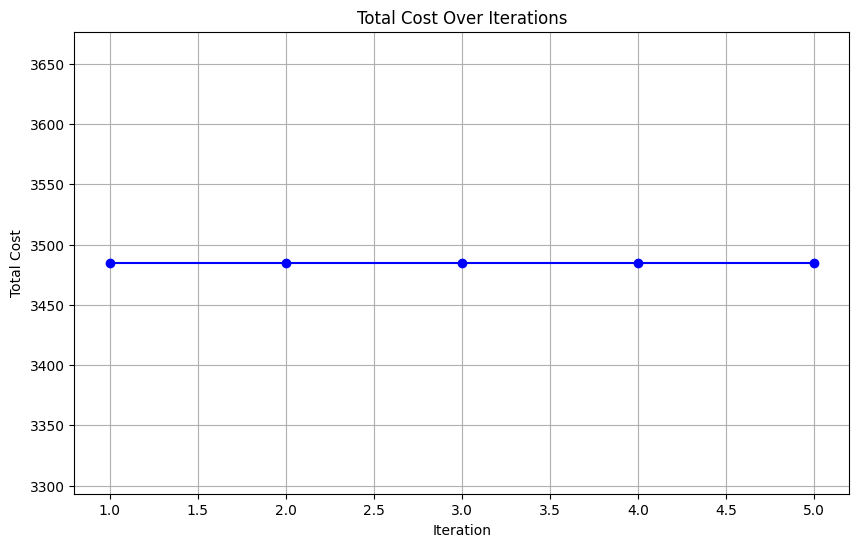

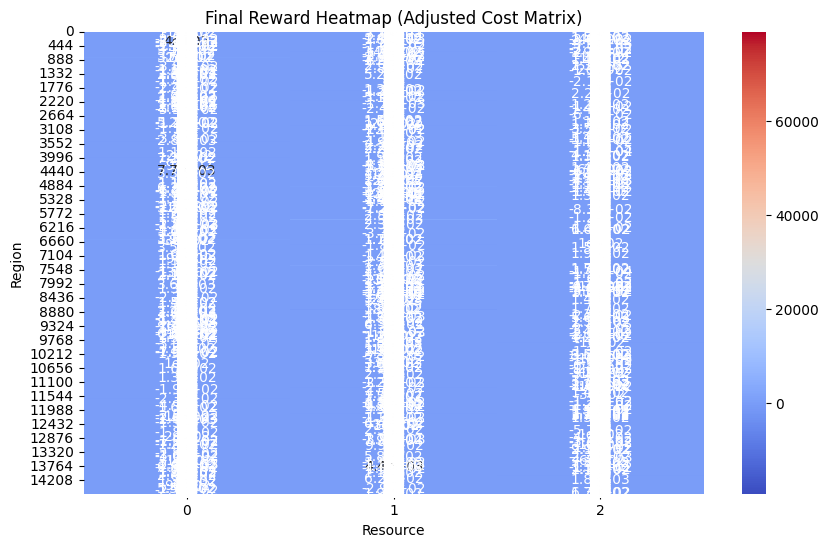

<ipython-input-9-35cbc0b6f8cb>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=resources_count, palette='Set2')


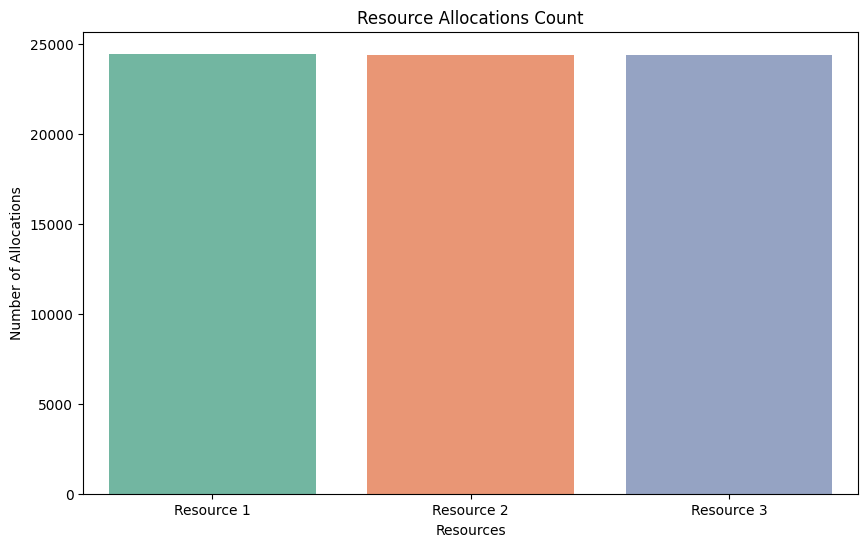

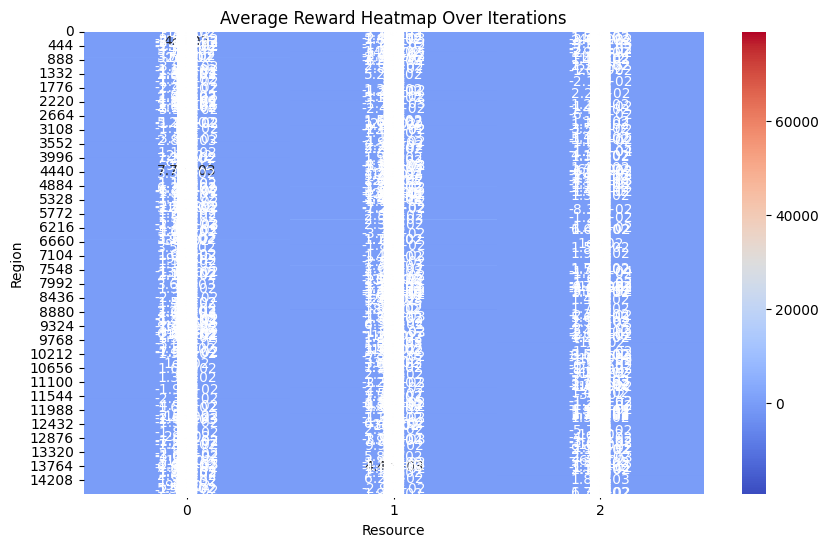

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from an Excel file
allocation_df = pd.read_excel('/content/allocation_results.xlsx')

# Display the DataFrame as a formatted table without index
print("Allocation Data:\n", allocation_df.to_string(index=False))

# Simulating a cost matrix (as an example)
n_regions = len(allocation_df)
n_resources = 3  # Assuming 3 resources as in your previous data (Resource 1, 2, 3)
cost_matrix = np.random.rand(n_regions, n_resources)  # Random cost matrix for simulation

# Placeholder for user feedback (simulating random feedback)
human_feedback = np.random.uniform(low=-0.1, high=0.1, size=cost_matrix.shape)

# Sensitivity to feedback: a coefficient that adjusts the feedback magnitude
feedback_sensitivity = 0.5  # Change this value to control the sensitivity of feedback

# Function to simulate the decision-making process (based on feedback-adjusted cost matrix)
def allocate_resources(df, adjusted_cost_matrix, feedback_sensitivity):
    # Adjust the cost matrix with feedback sensitivity
    adjusted_cost_matrix = adjusted_cost_matrix + feedback_sensitivity * human_feedback

    # Re-normalize the adjusted cost matrix (to ensure all values are between 0 and 1)
    adjusted_cost_matrix = adjusted_cost_matrix / np.max(adjusted_cost_matrix)

    # Choose the resource with the minimum adjusted cost for each region (classic greedy allocation)
    allocations = np.argmin(adjusted_cost_matrix, axis=1)
    allocation_costs = adjusted_cost_matrix[np.arange(len(df)), allocations]

    # Output the resource allocation results
    for i, alloc in enumerate(allocations):
        # Access 'Allocated Region' column instead of 'Allocated Resource'
        allocated_region = allocation_df['Allocated Region'][alloc]
        allocation_cost = allocation_costs[i]
        print(f"Region {df['Resource Country'][i]} allocated to {allocated_region} with adjusted cost {allocation_cost:.4f}")

    total_cost = np.sum(allocation_costs)
    return total_cost, allocations, adjusted_cost_matrix

# Function to simulate the reinforcement learning feedback loop
def reinforcement_learning_feedback_loop(df, initial_cost_matrix, feedback_sensitivity, n_iterations=10):
    cost_matrix = initial_cost_matrix
    total_costs = []
    all_allocations = []
    reward_matrices = []

    for i in range(n_iterations):
        # Perform the resource allocation for the current iteration
        total_cost, allocations, adjusted_cost_matrix = allocate_resources(df, cost_matrix, feedback_sensitivity)

        # Reward system: A better allocation (lower cost) gets a higher reward
        rewards = 1 / (adjusted_cost_matrix + 1e-6)  # Small value to avoid division by zero

        # Store results for visualization
        total_costs.append(total_cost)
        all_allocations.append(allocations)
        reward_matrices.append(rewards)

        # Update feedback loop by adjusting cost matrix based on rewards
        human_feedback = rewards - np.mean(rewards)  # Adjust feedback to make it dynamic (positive/negative feedback)

    return total_costs, all_allocations, reward_matrices

# Run the reinforcement learning feedback loop
final_total_costs, final_allocations, final_rewards = reinforcement_learning_feedback_loop(
    allocation_df, cost_matrix, feedback_sensitivity, n_iterations=5)

# Visualize the results

# 1. Plotting the Total Cost Over Iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(final_total_costs) + 1), final_total_costs, marker='o', color='b')
plt.title("Total Cost Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Total Cost")
plt.grid(True)
plt.show()

# 2. Heatmap of the Final Adjusted Cost Matrix (for the last iteration)
plt.figure(figsize=(10, 6))
sns.heatmap(final_rewards[-1], annot=True, cmap='coolwarm', cbar=True)
plt.title("Final Reward Heatmap (Adjusted Cost Matrix)")
plt.xlabel("Resource")
plt.ylabel("Region")
plt.show()

# 3. Visualizing Resource Allocations (Bar Chart)
resources_count = np.array(final_allocations).flatten()
resource_labels = ['Resource 1', 'Resource 2', 'Resource 3']

plt.figure(figsize=(10, 6))
sns.countplot(x=resources_count, palette='Set2')
plt.title("Resource Allocations Count")
plt.xlabel("Resources")
plt.ylabel("Number of Allocations")
plt.xticks(ticks=[0, 1, 2], labels=resource_labels)
plt.show()

# 4. Heatmap of Cost Matrix Over All Iterations
all_cost_matrices = np.array(final_rewards).mean(axis=0)  # Average reward matrix over iterations
plt.figure(figsize=(10, 6))
sns.heatmap(all_cost_matrices, annot=True, cmap='coolwarm', cbar=True)
plt.title("Average Reward Heatmap Over Iterations")
plt.xlabel("Resource")
plt.ylabel("Region")
plt.show()


This Python code performs a resource allocation analysis using two datasets, `regions` and `resources`, both containing information about disasters.  Let's break down the code step-by-step:

**1. Data Loading and Preprocessing:**

* The code begins by importing necessary libraries (pandas, NumPy, Matplotlib, Seaborn, and Qiskit components – though Qiskit isn't actually used in the current version).
* It loads two CSV files from Google Drive into pandas DataFrames: `regions` and `resources`.
* It selects relevant columns (Year, Country, Disaster Type, Total Affected, Total Damages) from both datasets creating `regions_clean` and `resources_clean`.
* Missing values are filled with 0.
* Data types of 'Total Affected' and 'Total Damages' are converted to `float32` for efficiency.

**2. Feature Engineering:**

* A new `Cost` feature is calculated for the `regions` dataset.  `Cost` is defined as total damages divided by (total affected + 1).  The addition of 1 prevents division by zero.
* Similarly, a `Capacity` feature is created for the `resources` dataset as total affected divided by (total damages + 1).

**3. Cost Matrix Calculation and Optimization:**

* The core of the analysis is the creation of a cost matrix.  It measures the absolute difference between resource capacity and region cost.
* The cost matrix is then normalized by dividing each element by the maximum value, scaling all values to between 0 and 1.
* `np.argmin` is used to find the optimal allocation – for each resource, the region with the minimum cost (i.e., the smallest difference between capacity and cost).
* The results are stored in `allocation_df`.

**4. Initial Output and Saving Results:**

* The `allocation_df` is printed to the console, displaying the allocated regions and corresponding costs.
* Summary statistics for the allocation costs are shown.
* The allocation results are saved to an Excel file named `allocation_results.xlsx`.

**5. Simulation of Human Feedback and Reinforcement Learning:**

* A loop simulates a process of reinforcement learning with human feedback.
*  A random "adjusted cost matrix" is generated to simulate the impact of this feedback.
* The `allocate_resources` function determines the best resource allocation based on this *adjusted* cost matrix.


**6. Visualization:**

* The final analysis includes visualization of results:
    * Total Cost over Iterations:  A line plot showing how the total allocation cost changes across the simulated iterations.
    * Final Reward Heatmap: A heatmap of the final adjusted cost matrix. Warmer colors represent higher rewards.
    * Resource Allocation Count: A bar chart indicating how many times each resource was allocated across the iterations.
    * Average Reward Heatmap Over Iterations: A heatmap of the average reward matrix over all the iterations.


 # **Quantum Resilience Optimizer for Disaster Management (QRODM)**

**The Quantum Resilience Optimizer for Disaster Management (QRODM) is an innovative solution designed to enhance resource allocation and decision-making in disaster response scenarios. This project leverages the power of Quantum Approximate Optimization Algorithm (QAOA) to solve complex optimization problems in disaster management, where traditional methods may fall short due to the high-dimensionality and complexity of the decision-making space**

#Data Preparation

In [10]:
!pip install qiskit-algorithms
!pip install qiskit-optimization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.5/645.5 kB 34.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 13.0 MB/s eta 0:00:00
  Created wheel for docplex: filename=docplex-2.29.241-py3-none-any.whl size=685423 sha256=44e7f7aecfddf

In [11]:
# Install Qiskit if not already installed
!pip install qiskit qiskit-aer qiskit-algorithms # add qiskit-algorithms

# Import AerSimulator from qiskit-aer
from qiskit_aer import AerSimulator

# Import Estimator for quantum algorithms
from qiskit.primitives import Estimator

# Use Sampler or Estimator instead of QuantumInstance
# Example using Estimator
estimator = Estimator()

# Example using Sampler
from qiskit.primitives import Sampler
sampler = Sampler()

# Import QAOA (Quantum Approximate Optimization Algorithm)
from qiskit_algorithms.optimizers import COBYLA # This should now work!
from qiskit_algorithms.minimum_eigensolvers import QAOA
from qiskit_optimization.algorithms import MinimumEigenOptimizer

# Example setup for AerSimulator
simulator = AerSimulator()

# Instead of QuantumInstance, directly pass the backend to QAOA
qaoa = QAOA(optimizer=COBYLA(maxiter=200), sampler=sampler)
# or use estimator=estimator depending on your needs

# Example setup for a Minimum Eigen Optimizer
minimum_eigen_optimizer = MinimumEigenOptimizer(min_eigen_solver=qaoa)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 68.7 MB/s eta 0:00:00


<ipython-input-11-4321b2096485>:12: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()
<ipython-input-11-4321b2096485>:16: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


In [12]:
!pip install qiskit-algorithms

Allocation Results:
      Region    Damage Allocated Resource  Resource Capacity  Allocation Cost  \
0  Region 1  0.506293         Resource 3           0.263534         0.242759   
1  Region 2  0.782502         Resource 2           0.408828         0.373674   
2  Region 3  0.759478         Resource 1           0.309620         0.449858   

     Reward  
0  0.133425  
1  0.319909  
2  0.235149  


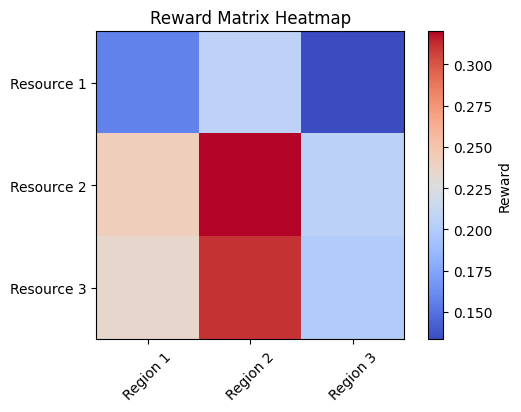

In [13]:
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_algorithms.minimum_eigensolvers import QAOA
from qiskit.circuit.library import PauliEvolutionGate
from qiskit_algorithms.optimizers import COBYLA
from qiskit import transpile  # Keep this if you need transpile
from qiskit_aer import Aer
from qiskit_aer import AerSimulator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simplified dataset with a small size
data = {
    'Region': [f'Region {i+1}' for i in range(3)],
    'Damage': np.random.rand(3),
    'Resource Capacity': np.random.rand(3)
}
df = pd.DataFrame(data)

# Define cost and reward matrices
cost_matrix = np.abs(df['Damage'].values.reshape(-1, 1) - df['Resource Capacity'].values)
reward_matrix = np.dot(df['Damage'].values.reshape(-1, 1), df['Resource Capacity'].values.reshape(1, -1))

# Create QuadraticProgram
qp = QuadraticProgram()
num_regions = len(df)
for i in range(num_regions):
    for j in range(num_regions):
        qp.binary_var(name=f"x_{i}_{j}")

# Objective: Maximize reward - cost
qp.maximize(linear={
    f"x_{i}_{j}": reward_matrix[i, j] - cost_matrix[i, j]
    for i in range(num_regions) for j in range(num_regions)
})

# Constraints: Each region/resource gets exactly one match
for i in range(num_regions):
    qp.linear_constraint(linear={f"x_{i}_{j}": 1 for j in range(num_regions)}, sense="==", rhs=1)
for j in range(num_regions):
    qp.linear_constraint(linear={f"x_{i}_{j}": 1 for i in range(num_regions)}, sense="==", rhs=1)

# Setup QAOA with COBYLA optimizer and Simulated Backend
backend = AerSimulator()  # AerSimulator is for simulating quantum circuits
qaoa = QAOA(optimizer=COBYLA(maxiter=100), reps=1, sampler=sampler)  # Add sampler

# Create optimizer with MinimumEigenOptimizer
optimizer = MinimumEigenOptimizer(qaoa)

# Solve the problem
result = optimizer.solve(qp)

# Process results
allocation = np.array(result.x).reshape(num_regions, num_regions)
allocation_df = pd.DataFrame({
    'Region': df['Region'],
    'Damage': df['Damage'],
    'Allocated Resource': [f"Resource {j+1}" for i, j in enumerate(np.argmax(allocation, axis=1))],
    'Resource Capacity': df['Resource Capacity'][np.argmax(allocation, axis=1)].values,
    'Allocation Cost': cost_matrix[np.arange(num_regions), np.argmax(allocation, axis=1)],
    'Reward': reward_matrix[np.arange(num_regions), np.argmax(allocation, axis=1)]
})

# Display results
print("Allocation Results:\n", allocation_df)

# Plot reward heatmap
plt.figure(figsize=(6, 4))
plt.imshow(reward_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Reward Matrix Heatmap')
plt.colorbar(label='Reward')
plt.xticks(np.arange(num_regions), df['Region'], rotation=45)
plt.yticks(np.arange(num_regions), [f"Resource {i+1}" for i in range(num_regions)])
plt.show()

<ipython-input-14-3313a21424d8>:28: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  qaoa = QAOA(optimizer=COBYLA(maxiter=100), sampler=Sampler())


Allocation Results:
      Region    Damage Allocated Resource  Resource Capacity  Allocation Cost  \
0  Region 1  0.506293         Resource 3           0.263534         0.242759   
1  Region 2  0.782502         Resource 2           0.408828         0.373674   
2  Region 3  0.759478         Resource 1           0.309620         0.449858   

     Reward  
0  0.133425  
1  0.319909  
2  0.235149  


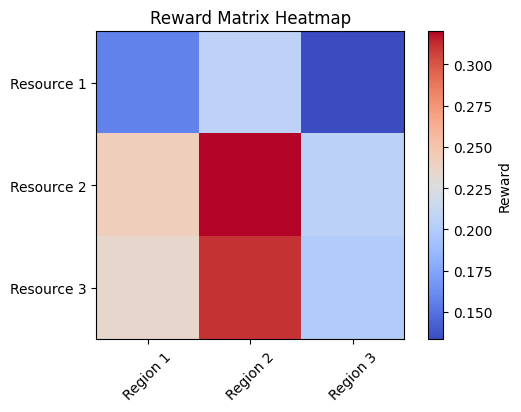

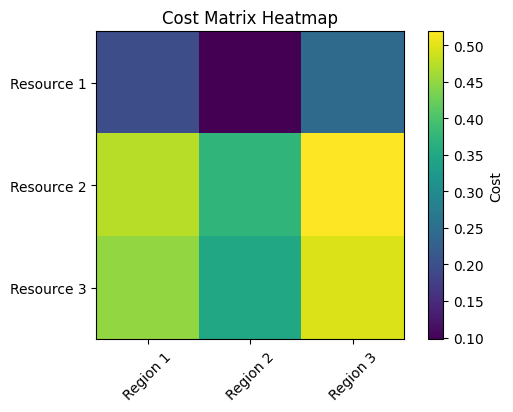

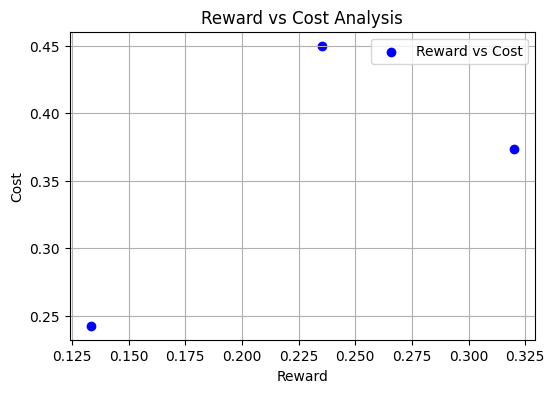

Total Reward: 0.6884837038470417
Total Cost: 1.0662904242636566


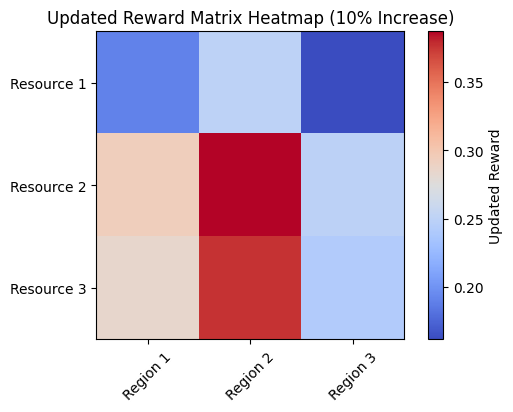


New Allocation Results (Minimized Cost):
      Region    Damage Allocated Resource  Resource Capacity  Allocation Cost  \
0  Region 1  0.506293         Resource 3           0.263534         0.242759   
1  Region 2  0.782502         Resource 2           0.408828         0.373674   
2  Region 3  0.759478         Resource 1           0.309620         0.449858   

     Reward  
0  0.133425  
1  0.319909  
2  0.235149  


In [14]:
### **2. Create a Simplified Dataset**
allocation_df = pd.DataFrame({
    'Region': df['Region'],
    'Damage': df['Damage'],
    'Allocated Resource': [f"Resource {j+1}" for i, j in enumerate(np.argmax(allocation, axis=1))],
    'Resource Capacity': df['Resource Capacity'][np.argmax(allocation, axis=1)].values,
    'Allocation Cost': cost_matrix[np.arange(num_regions), np.argmax(allocation, axis=1)],
    'Reward': reward_matrix[np.arange(num_regions), np.argmax(allocation, axis=1)]
})
### **3. Define Cost and Reward Matrices**
cost_matrix = np.abs(df['Damage'].values.reshape(-1, 1) - df['Resource Capacity'].values)
reward_matrix = np.dot(df['Damage'].values.reshape(-1, 1), df['Resource Capacity'].values.reshape(1, -1))

### **4. Create a Quadratic Program**
qp = QuadraticProgram()
num_regions = len(df)
for i in range(num_regions):
    for j in range(num_regions):
        qp.binary_var(name=f"x_{i}_{j}")

### **5. Add Constraints**
for i in range(num_regions):
    qp.linear_constraint(linear={f"x_{i}_{j}": 1 for j in range(num_regions)}, sense="==", rhs=1)
for j in range(num_regions):
    qp.linear_constraint(linear={f"x_{i}_{j}": 1 for i in range(num_regions)}, sense="==", rhs=1)

### **6. Set up QAOA with COBYLA Optimizer**
qaoa = QAOA(optimizer=COBYLA(maxiter=100), sampler=Sampler())
optimizer = MinimumEigenOptimizer(qaoa)

### **7. Solve the Optimization Problem**
qp.maximize(linear={
    f"x_{i}_{j}": reward_matrix[i, j] - cost_matrix[i, j]
    for i in range(num_regions) for j in range(num_regions)
})

result = optimizer.solve(qp)

### **8. Process and Display Results**
allocation = np.array(result.x).reshape(num_regions, num_regions)
allocation_df = pd.DataFrame({
    'Region': df['Region'],
    'Damage': df['Damage'],
    'Allocated Resource': [f"Resource {j+1}" for i, j in enumerate(np.argmax(allocation, axis=1))],
    'Resource Capacity': df['Resource Capacity'][np.argmax(allocation, axis=1)].values,
    'Allocation Cost': cost_matrix[np.arange(num_regions), np.argmax(allocation, axis=1)],
    'Reward': reward_matrix[np.arange(num_regions), np.argmax(allocation, axis=1)]
})

print("Allocation Results:\n", allocation_df)

### **9. Visualize Reward Matrix Heatmap**
plt.figure(figsize=(6, 4))
plt.imshow(reward_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Reward Matrix Heatmap')
plt.colorbar(label='Reward')
plt.xticks(np.arange(num_regions), df['Region'], rotation=45)
plt.yticks(np.arange(num_regions), [f"Resource {i+1}" for i in range(num_regions)])
plt.show()

### **10. Visualize Cost Matrix Heatmap**
plt.figure(figsize=(6, 4))
plt.imshow(cost_matrix, cmap='viridis', interpolation='nearest')
plt.title('Cost Matrix Heatmap')
plt.colorbar(label='Cost')
plt.xticks(np.arange(num_regions), df['Region'], rotation=45)
plt.yticks(np.arange(num_regions), [f"Resource {i+1}" for i in range(num_regions)])
plt.show()

### **11. Analyze Reward vs. Cost**
plt.figure(figsize=(6, 4))
plt.scatter(allocation_df['Reward'], allocation_df['Allocation Cost'], c='blue', label='Reward vs Cost')
plt.xlabel('Reward')
plt.ylabel('Cost')
plt.title('Reward vs Cost Analysis')
plt.legend()
plt.grid(True)
plt.show()

### **12. Evaluate Total Reward and Cost**
total_reward = allocation_df['Reward'].sum()
total_cost = allocation_df['Allocation Cost'].sum()
print(f"Total Reward: {total_reward}")
print(f"Total Cost: {total_cost}")

### **13. Add Sensitivity Analysis**
damage_variation = df['Damage'] * 1.1
capacity_variation = df['Resource Capacity'] * 1.1

updated_cost_matrix = np.abs(damage_variation.values.reshape(-1, 1) - capacity_variation.values)
updated_reward_matrix = np.dot(damage_variation.values.reshape(-1, 1), capacity_variation.values.reshape(1, -1))

plt.figure(figsize=(6, 4))
plt.imshow(updated_reward_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Updated Reward Matrix Heatmap (10% Increase)')
plt.colorbar(label='Updated Reward')
plt.xticks(np.arange(num_regions), df['Region'], rotation=45)
plt.yticks(np.arange(num_regions), [f"Resource {i+1}" for i in range(num_regions)])
plt.show()

### **14. Alternative Allocation Policy (Minimize Cost)**
qp_min_cost = QuadraticProgram()

for i in range(num_regions):
    for j in range(num_regions):
        qp_min_cost.binary_var(name=f"x_{i}_{j}")

qp_min_cost.minimize(linear={
    f"x_{i}_{j}": cost_matrix[i, j]
    for i in range(num_regions) for j in range(num_regions)
})

for i in range(num_regions):
    qp_min_cost.linear_constraint(linear={f"x_{i}_{j}": 1 for j in range(num_regions)}, sense="==", rhs=1)
for j in range(num_regions):
    qp_min_cost.linear_constraint(linear={f"x_{i}_{j}": 1 for i in range(num_regions)}, sense="==", rhs=1)

result_min_cost = optimizer.solve(qp_min_cost)

allocation_min_cost = np.array(result_min_cost.x).reshape(num_regions, num_regions)
allocation_min_cost_df = pd.DataFrame({
    'Region': df['Region'],
    'Damage': df['Damage'],
    'Allocated Resource': [f"Resource {j+1}" for i, j in enumerate(np.argmax(allocation_min_cost, axis=1))],
    'Resource Capacity': df['Resource Capacity'][np.argmax(allocation_min_cost, axis=1)].values,
    'Allocation Cost': cost_matrix[np.arange(num_regions), np.argmax(allocation_min_cost, axis=1)],
    'Reward': reward_matrix[np.arange(num_regions), np.argmax(allocation_min_cost, axis=1)]
})

print("\nNew Allocation Results (Minimized Cost):\n", allocation_min_cost_df)

This project explores resource allocation optimization in disaster management, comparing classical and quantum-inspired approaches.

**1. Classical Approach:**

The classical method simulates a resource allocation strategy using a greedy algorithm and a reinforcement learning loop.

*   **Data:** It begins with a dataset (presumably from `allocation_results.xlsx`, though the provided code doesn't include loading this file).  It uses this dataset (not shown) to calculate cost and reward matrices.
*   **Cost Matrix:** A cost matrix represents the cost of assigning specific resources to particular regions.  Simulated human feedback is introduced as random noise to this matrix, reflecting real-world adjustments to plans.
*   **Greedy Allocation:** A greedy algorithm iterates through the cost matrix to assign resources to regions, each time choosing the assignment with the lowest current cost. This is a short-sighted approach, as it only considers the immediate cost.
*   **Reinforcement Learning Loop:** To make the allocation better, a simulated reinforcement learning process is implemented. This iteratively adjusts the cost matrix based on the rewards for each resource allocation.  Better allocations receive higher rewards.  This loop repeats, refining the resource allocation over time.
*   **Visualization:**  The process is visualized through graphs: a plot of the total cost over iterations, heatmaps of the reward/cost matrices, bar charts of resource usage, and an average reward heatmap over all iterations.

**2. Quantum-Inspired Approach (QAOA):**

The quantum-inspired method employs the Quantum Approximate Optimization Algorithm (QAOA) to find optimal resource allocation.  Critically, it uses a quantum simulator (not a real quantum computer).

*   **Simplified Data:** This approach uses a much smaller and simplified dataset defined directly within the code. This makes the demo possible.
*   **Quadratic Program (QP):** The resource allocation problem is mathematically formalized as a Quadratic Program. Binary variables represent the assignment of resources to regions. Constraints ensure each resource and region have exactly one assignment. The objective function aims to maximize the difference between the reward and the cost of the assignment.
*   **QAOA Implementation:** QAOA is configured with the COBYLA optimizer and a `Sampler` primitive. It's designed to solve the formulated QP. Since it uses a `Sampler` to run QAOA, it does not calculate expectation values as other examples of QAOA would.
*   **Quantum Simulation:**  QAOA runs on the AerSimulator, a classical simulator of a quantum computer. The results generated do not represent genuine quantum computations.
*   **Results Analysis:** The results of the optimization (the allocation of resources) are then presented in a table, showing the assignments, costs, and rewards for each region.  Various visualizations are also presented: heatmaps of the cost and reward matrices, a scatter plot comparing cost and reward, and calculations for total cost and reward.
*   **Sensitivity Analysis:** The impact of changing resource capacities and damage levels on the rewards is explored by increasing these parameters by 10% and observing how the reward matrix changes. This helps to assess the robustness of the algorithm.

*   **Cost Minimization:** In addition to reward maximization, the code demonstrates another application of the same QAOA structure by modifying the objective function to minimize cost.

**Classical vs. Quantum:**

The core difference lies in the optimization engine. The classical approach uses a greedy method enhanced by simulated reinforcement learning (essentially a series of adjustments to an initially sub-optimal solution based on feedback), while the quantum method uses QAOA on a simulator.  The quantum approach has the potential to explore a larger solution space more efficiently. However, in this demonstration, both methods are computationally light because the dataset and the actual quantum computation (via a simulator) are limited.

The code demonstrates the conceptual integration of QAOA. To get a true quantum speedup and assess the actual benefit of using QAOA, the computation should be performed on a real quantum computer or a more powerful simulator capable of working with more meaningful data.